In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pywaffle import Waffle
import math
from sklearn.metrics.pairwise import euclidean_distances

In [49]:
base = pd.read_csv('Base mesclada filtrada.csv')

In [50]:
base_original = base.copy()
base.drop(labels=['YrSold','YearBuilt','Unnamed: 0'], axis=1, inplace=True)

In [4]:
base.head()

,SalePrice,MSZoning,HeatingQC,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt
0,208500.0,RL,Ex,3,548.0,8450,2,5
1,181500.0,RL,Ex,3,460.0,9600,2,31
2,223500.0,RL,Ex,3,608.0,11250,2,7
3,140000.0,RL,Gd,3,642.0,9550,1,91
4,250000.0,RL,Ex,4,836.0,14260,2,8


In [5]:
base.shape

(2919, 8)

In [6]:
base.corr()

,SalePrice,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt
SalePrice,1.000000,0.229611,0.464809,0.296497,0.433710,-0.363226
BedroomAbvGr,0.229611,1.000000,0.073912,0.132801,0.356125,0.052136
GarageArea,0.464809,0.073912,1.000000,0.213251,0.408487,-0.480602
LotArea,0.296497,0.132801,0.213251,1.000000,0.125826,-0.025143
FullBath,0.433710,0.356125,0.408487,0.125826,1.000000,-0.470686
YrSold - YearBuilt,-0.363226,0.052136,-0.480602,-0.025143,-0.470686,1.000000


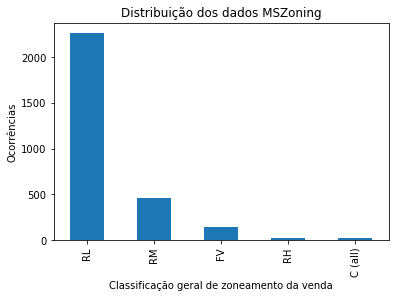

In [7]:
base['MSZoning'].value_counts().to_frame().plot(kind='bar', legend=None)
plt.title('Distribuição dos dados MSZoning')
plt.ylabel('Ocorrências')
plt.xlabel('Classificação geral de zoneamento da venda')
plt.show()

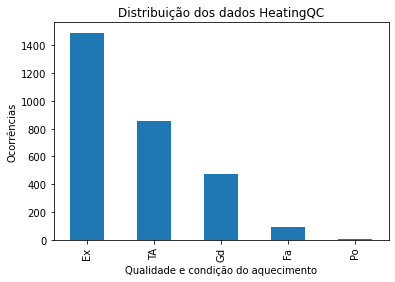

In [8]:
base['HeatingQC'].value_counts().to_frame().plot(kind='bar', legend=None)
plt.title('Distribuição dos dados HeatingQC')
plt.ylabel('Ocorrências')
plt.xlabel('Qualidade e condição do aquecimento')
plt.show()

In [9]:
base['MSZoning'].shape[0]

2919

In [10]:
valores_grafico = (base['MSZoning'].value_counts()/base['MSZoning'].shape[0]*100).apply(lambda x: math.ceil(x)).to_dict()

In [11]:
valores_grafico

{'RL': 78, 'RM': 16, 'FV': 5, 'RH': 1, 'C (all)': 1}

In [12]:
# compensar para o gráfico ficar mais bonito
valores_grafico['RL']=valores_grafico['RL']-1

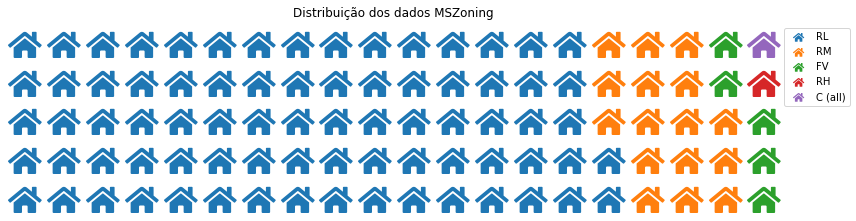

In [13]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=valores_grafico, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', 
    font_size=30, 
    icon_legend=True,
    figsize=(12, 8)
)
plt.title('Distribuição dos dados MSZoning')
plt.show()

In [14]:
valores_grafico2 = (base['HeatingQC'].value_counts()/base['HeatingQC'].shape[0]*100).apply(lambda x: math.ceil(x)).to_dict()

In [15]:
valores_grafico2

{'Ex': 52, 'TA': 30, 'Gd': 17, 'Fa': 4, 'Po': 1}

In [16]:
# compensar para o gráfico ficar maos bonito
valores_grafico2['Ex']=valores_grafico2['Ex']+1

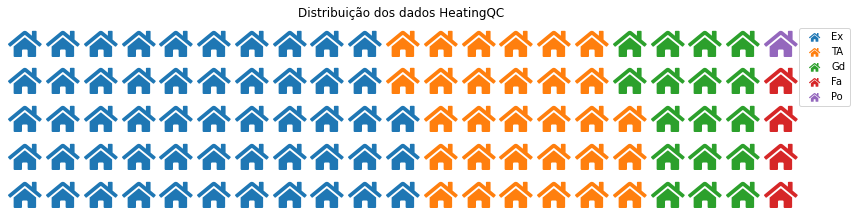

In [17]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=valores_grafico2, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', 
    font_size=30, 
    icon_legend=True,
    figsize=(12, 8)
)
plt.title('Distribuição dos dados HeatingQC')
plt.show()

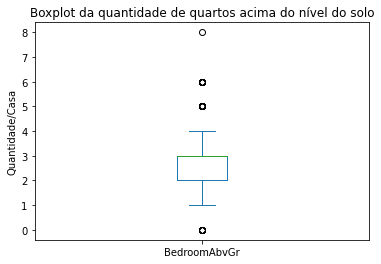

In [18]:
base[['BedroomAbvGr']].plot(kind='box')
plt.title('Boxplot da quantidade de quartos acima do nível do solo')
plt.ylabel('Quantidade/Casa')
plt.show()

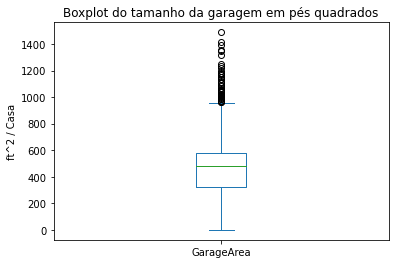

In [19]:
base[['GarageArea']].plot(kind='box')
plt.title('Boxplot do tamanho da garagem em pés quadrados')
plt.ylabel('ft^2 / Casa')
plt.show()

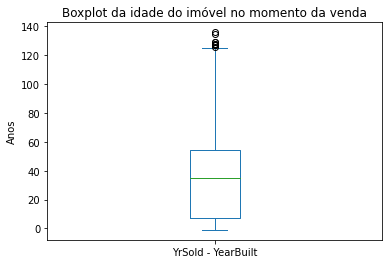

In [20]:
base[['YrSold - YearBuilt']].plot(kind='box')
plt.title('Boxplot da idade do imóvel no momento da venda')
plt.ylabel('Anos')
plt.show()

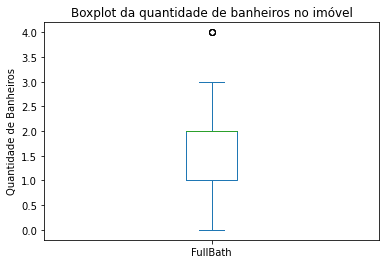

In [21]:
base[['FullBath']].plot(kind='box')
plt.title('Boxplot da quantidade de banheiros no imóvel')
plt.ylabel('Quantidade de Banheiros')
plt.show()

## Usando one-hot encoding para quantificar os dados qualitativos

In [22]:
dummy_MSZoning = pd.get_dummies(base['MSZoning'])
dummy_HeatingQC = pd.get_dummies(base['HeatingQC'])
base_dummy = base.merge(dummy_MSZoning,left_index=True,right_index=True)
base_dummy = base_dummy.merge(dummy_HeatingQC,left_index=True,right_index=True)

In [23]:
base_dummy.corr()

,SalePrice,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt,C (all),FV,RH,RL,RM,Ex,Fa,Gd,Po,TA
SalePrice,1.000000,0.229611,0.464809,0.296497,0.433710,-0.363226,-0.075810,0.035770,-0.054856,0.210173,-0.230235,0.305709,-0.093934,-0.099081,-0.017271,-0.218063
BedroomAbvGr,0.229611,1.000000,0.073912,0.132801,0.356125,0.052136,-0.042963,-0.087169,0.024975,0.137434,-0.100253,-0.011929,-0.009871,-0.011007,-0.020546,0.027241
GarageArea,0.464809,0.073912,1.000000,0.213251,0.408487,-0.480602,-0.094305,0.113654,-0.046038,0.193937,-0.250265,0.314084,-0.116688,-0.106511,-0.010012,-0.212983
LotArea,0.296497,0.132801,0.213251,1.000000,0.125826,-0.025143,-0.021774,-0.102614,-0.031998,0.236318,-0.206661,0.018455,-0.005352,-0.022645,-0.000814,0.000193
FullBath,0.433710,0.356125,0.408487,0.125826,1.000000,-0.470686,-0.082038,0.165990,0.001530,0.124051,-0.216461,0.334659,-0.064748,-0.092800,-0.013614,-0.266381
YrSold - YearBuilt,-0.363226,0.052136,-0.480602,-0.025143,-0.470686,1.000000,0.155790,-0.240404,0.058366,-0.290233,0.412859,-0.459562,0.173118,0.160922,0.033332,0.305349
C (all),-0.075810,-0.042963,-0.094305,-0.021774,-0.082038,0.155790,1.000000,-0.020783,-0.008811,-0.172968,-0.040199,-0.057915,0.068350,-0.000601,-0.002981,0.038044
FV,0.035770,-0.087169,0.113654,-0.102614,0.165990,-0.240404,-0.020783,1.000000,-0.021198,-0.416131,-0.096713,0.192786,-0.040338,-0.063559,-0.007172,-0.144155
RH,-0.054856,0.024975,-0.046038,-0.031998,0.001530,0.058366,-0.008811,-0.021198,1.000000,-0.176424,-0.041003,-0.031354,-0.017102,-0.002195,-0.003041,0.042967
RL,0.210173,0.137434,0.193937,0.236318,0.124051,-0.290233,-0.172968,-0.416131,-0.176424,1.000000,-0.804905,0.056717,-0.030039,-0.048568,-0.059691,-0.007198


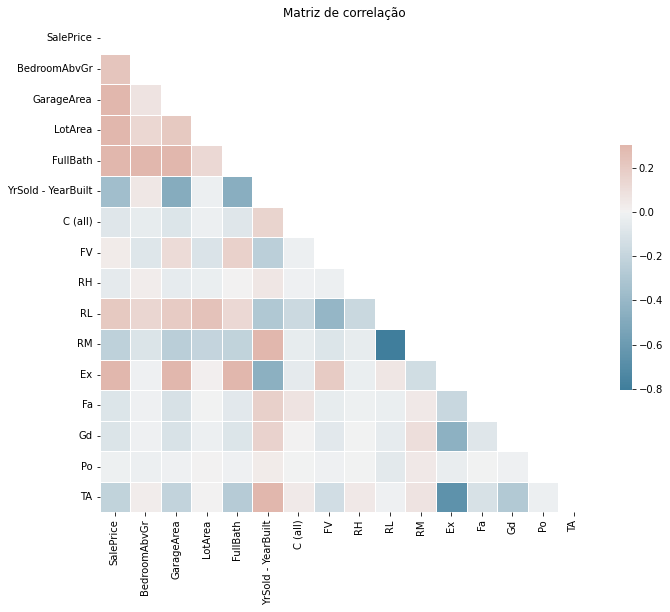

In [24]:
# Compute the correlation matrix
corr = base_dummy.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlação')
plt.show()

## medidas resumo (tendência central das variáveis escolhidas: média, moda, mediana)

In [189]:
base_dummy.describe().to_excel('medidasresumo.xlsx')

## Distribuição dos preços

Text(0.5, 0, 'Preço')

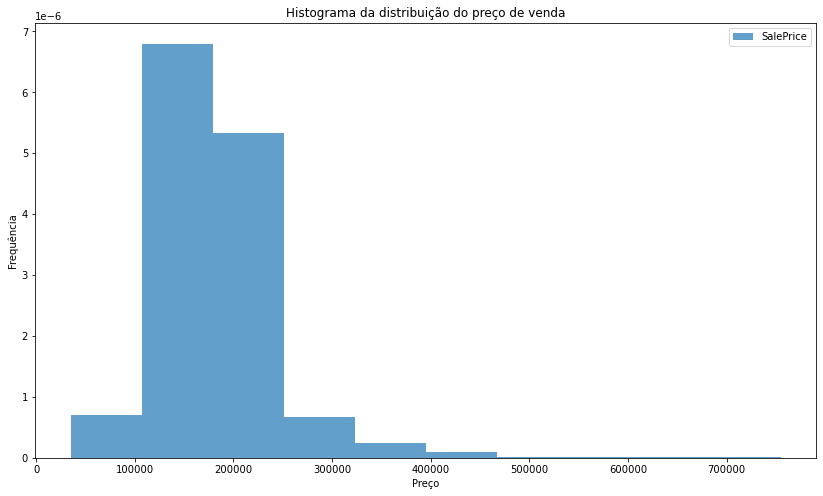

In [47]:
contagem, tam_coluna = np.histogram(base_dummy['SalePrice'])

base_dummy[['SalePrice']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8))
plt.title('Histograma da distribuição do preço de venda')
plt.ylabel('Frequência')
plt.xlabel('Preço')

Text(0.5, 1.0, 'Dispersão dos dados de venda com relação a idade do imóvel\n')

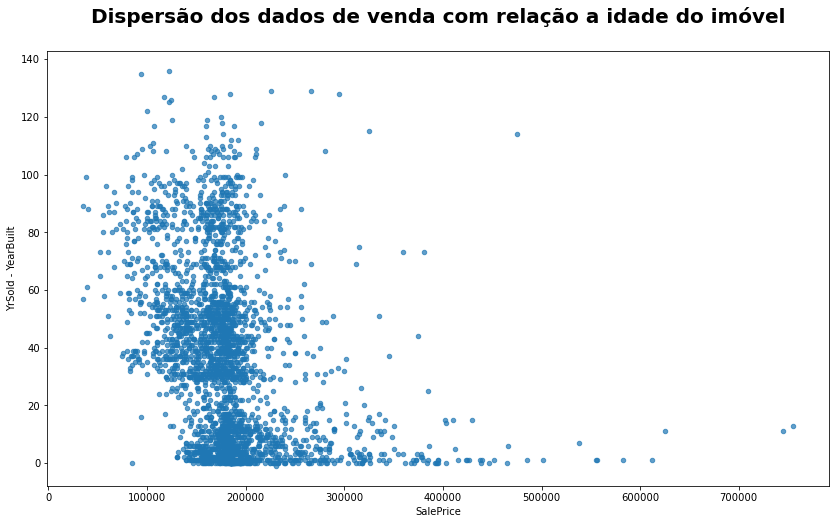

In [60]:
base_dummy.plot(kind='scatter', x='SalePrice', y='YrSold - YearBuilt', alpha=0.7, figsize=(14,8))
plt.title('Dispersão dos dados de venda com relação a idade do imóvel\n', fontdict = {'fontsize':20, 'fontweight':'bold'})

## Matriz covariancia

In [155]:
base_dummy_num = base_dummy.drop(['MSZoning','HeatingQC'], axis=1)
base_dummy_num_filtrada = base_dummy_num[base_dummy_num['GarageArea'].isnull()==False]
base_dummy_num_filtrada_sem_preco_lotarea = base_dummy_num_filtrada.drop(['SalePrice','LotArea'], axis=1)

In [156]:
# matriz de covariancia
covariancia = np.cov(base_dummy_num_filtrada, rowvar=False)

In [157]:
pd.DataFrame(covariancia, columns=base_dummy_num_filtrada.columns, index=base_dummy_num_filtrada.columns)

,SalePrice,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt,C (all),FV,RH,RL,RM,Ex,Fa,Gd,Po,TA
SalePrice,3.293769e+09,10843.188530,5.745881e+06,1.342297e+08,13766.924283,-632445.512254,-401.069735,437.273865,-295.911253,5030.241975,-4815.144880,8773.753812,-942.230782,-2098.062287,-31.771966,-5701.688777
BedroomAbvGr,1.084319e+04,0.677049,1.309970e+01,8.620403e+02,0.162045,1.299341,-0.003258,-0.015278,0.001932,0.047205,-0.030107,-0.004932,-0.001418,-0.003334,-0.000542,0.010225
GarageArea,5.745881e+06,13.099700,4.639493e+04,3.623361e+05,48.656783,-3139.592491,-1.872425,5.215096,-0.932033,17.413128,-19.629561,33.823154,-4.392684,-8.463677,-0.069120,-20.897672
LotArea,1.342297e+08,862.040275,3.623361e+05,6.222562e+07,549.115091,-5999.684660,-15.836252,-172.457882,-23.727405,777.242191,-593.859674,72.979501,-7.390275,-65.963345,-0.206199,0.580318
FullBath,1.376692e+04,0.162045,4.865678e+01,5.491151e+02,0.305816,-7.905488,-0.004181,0.019564,0.000081,0.028731,-0.043759,0.092479,-0.006254,-0.018911,-0.000241,-0.067073
YrSold - YearBuilt,-6.324455e+05,1.299341,-3.139592e+03,-5.999685e+03,-7.905488,919.825043,0.435862,-1.553120,0.166590,-3.660343,4.551996,-6.980391,0.918527,1.803983,0.032434,4.225448
C (all),-4.010697e+02,-0.003258,-1.872425e+00,-1.583625e+01,-0.004181,0.435862,0.008497,-0.000408,-0.000076,-0.006653,-0.001348,-0.002668,0.001101,-0.000021,-0.000009,0.001597
FV,4.372739e+02,-0.015278,5.215096e+00,-1.724579e+02,0.019564,-1.553120,-0.000408,0.045382,-0.000425,-0.036988,-0.007496,0.020544,-0.001502,-0.004998,-0.000049,-0.013995
RH,-2.959113e+02,0.001932,-9.320325e-01,-2.372740e+01,0.000081,0.166590,-0.000076,-0.000425,0.008834,-0.006919,-0.001402,-0.001472,-0.000281,-0.000077,-0.000009,0.001839
RL,5.030242e+03,0.047205,1.741313e+01,7.772422e+02,0.028731,-3.660343,-0.006653,-0.036988,-0.006919,0.173764,-0.122140,0.011959,-0.002198,-0.007517,-0.000798,-0.001446


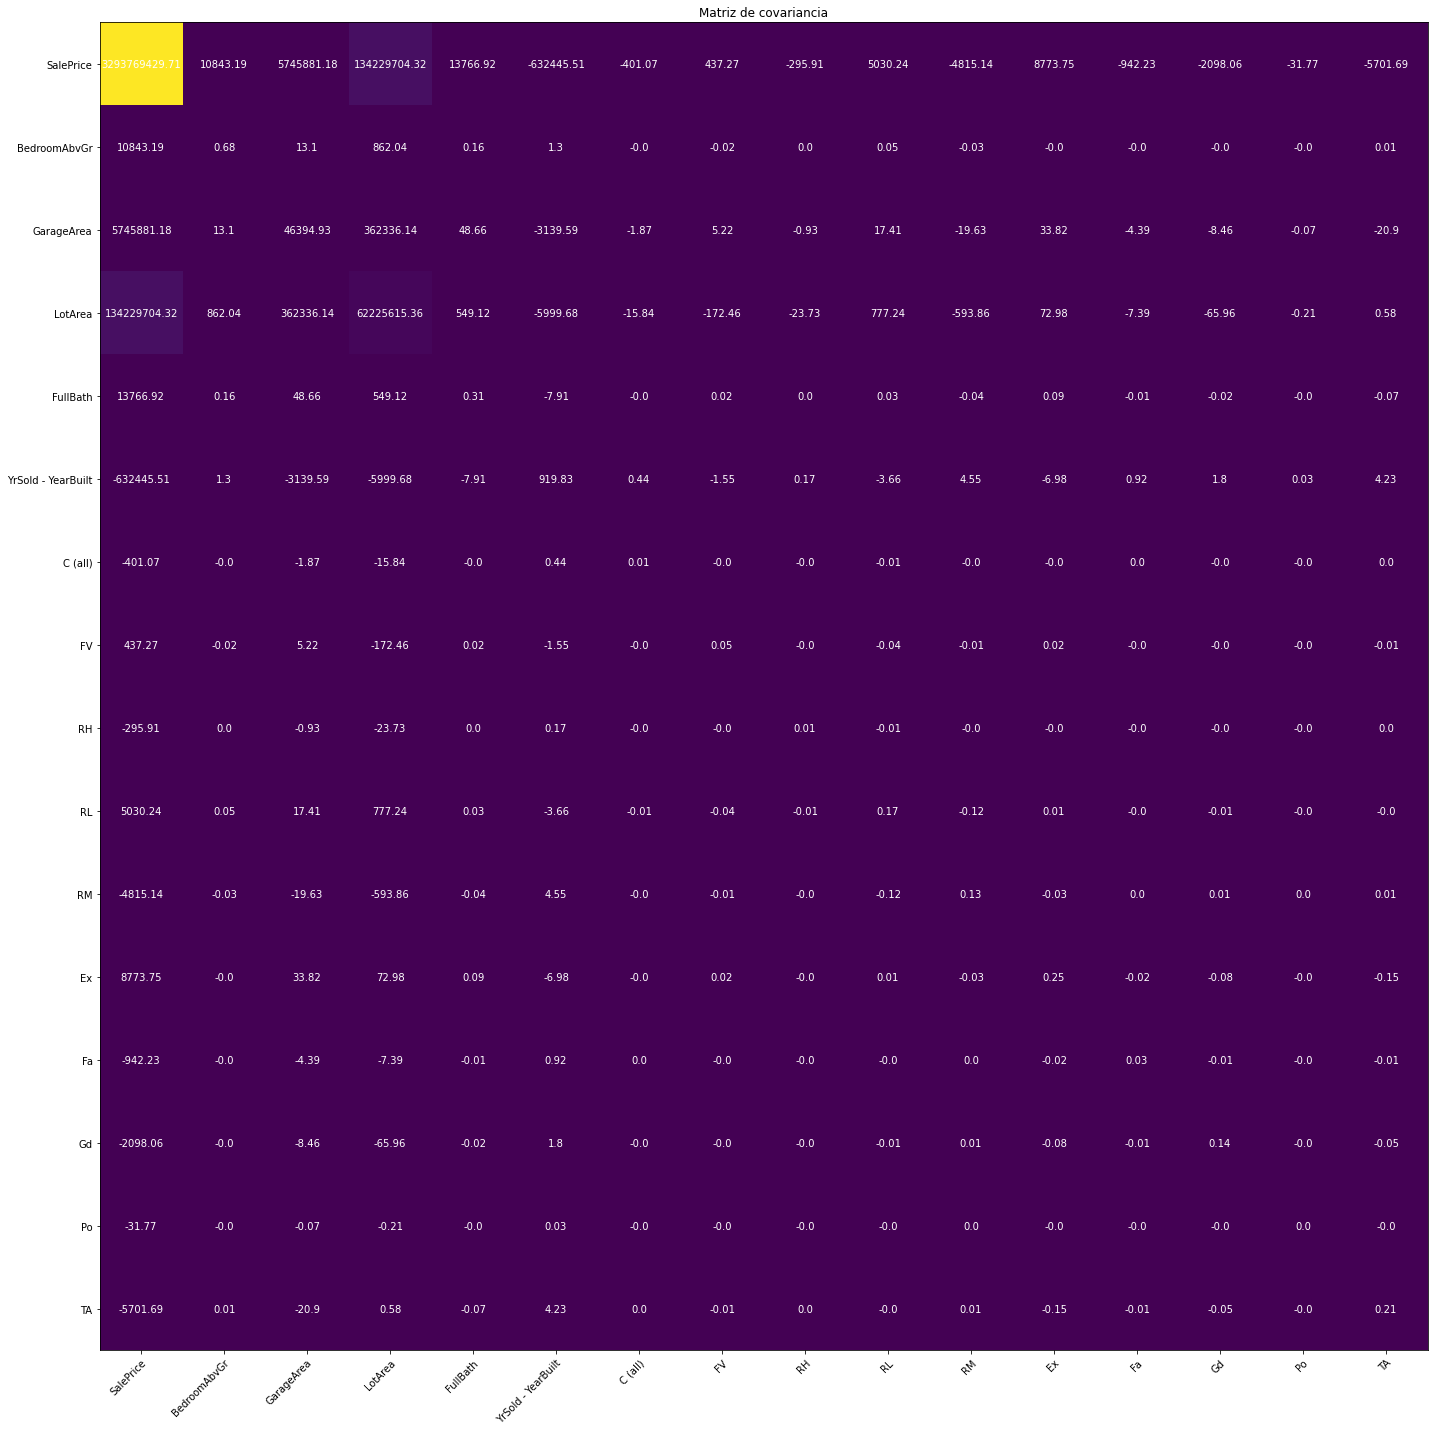

In [158]:

vegetables = base_dummy_num_filtrada.columns
farmers = base_dummy_num_filtrada.columns

harvest = np.array([[float("{:0.2f}".format(x)) for x in lista] for lista in covariancia])


fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de covariancia")
fig.tight_layout()
plt.show()

In [179]:
base.drop(['MSZoning','HeatingQC'])

,SalePrice,MSZoning,HeatingQC,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt
0,208500.000000,RL,Ex,3,548.0,8450,2,5
1,181500.000000,RL,Ex,3,460.0,9600,2,31
2,223500.000000,RL,Ex,3,608.0,11250,2,7
3,140000.000000,RL,Gd,3,642.0,9550,1,91
4,250000.000000,RL,Ex,4,836.0,14260,2,8
...,...,...,...,...,...,...,...,...
2914,167081.220949,RM,Gd,3,0.0,1936,1,36
2915,164788.778231,RM,TA,3,286.0,1894,1,36
2916,219222.423400,RL,Ex,4,576.0,20000,1,46
2917,184924.279659,RL,TA,3,0.0,10441,1,14


In [178]:
base.columns

Index(['SalePrice', 'MSZoning', 'HeatingQC', 'BedroomAbvGr', 'GarageArea',
       'LotArea', 'FullBath', 'YrSold - YearBuilt'],
      dtype='object')

## Comparação dos preços com as variáveis categóricas (TBD)

In [161]:
base_dummy.head()

,SalePrice,MSZoning,HeatingQC,BedroomAbvGr,GarageArea,LotArea,FullBath,YrSold - YearBuilt,C (all),FV,RH,RL,RM,Ex,Fa,Gd,Po,TA
0,208500.0,RL,Ex,3,548.0,8450,2,5,0,0,0,1,0,1,0,0,0,0
1,181500.0,RL,Ex,3,460.0,9600,2,31,0,0,0,1,0,1,0,0,0,0
2,223500.0,RL,Ex,3,608.0,11250,2,7,0,0,0,1,0,1,0,0,0,0
3,140000.0,RL,Gd,3,642.0,9550,1,91,0,0,0,1,0,0,0,1,0,0
4,250000.0,RL,Ex,4,836.0,14260,2,8,0,0,0,1,0,1,0,0,0,0


In [181]:
df_test = base_dummy[['MSZoning','SalePrice']].groupby(['MSZoning'], as_index=False).mean()

In [182]:
df_test.head()

,MSZoning,SalePrice
0,C (all),133257.122150
1,FV,189230.398290
2,RH,146854.972509
3,RL,186532.179832
4,RM,149512.759754


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

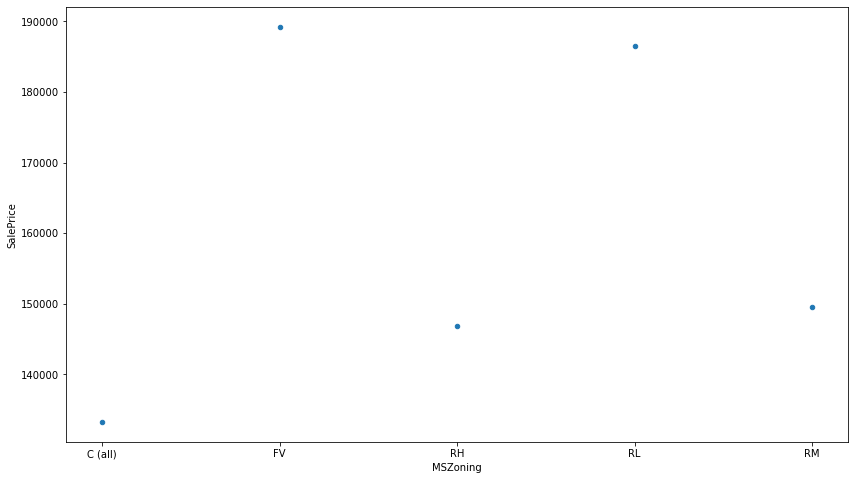

In [183]:
df_test.plot(kind='scatter',x='MSZoning', y='SalePrice', figsize=(14,8))